In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [4]:
# This cell performs BDT regression using one energy variable

name = ""
energy = 0
for j in range(10): #temporary, change to 10 when working
    energy = 100*(j+1)
    name = "/Users/User/Downloads/FASERnu1-"+str(energy)+".root"
    print("Energy = "+str(energy)+" GeV")
    file = uproot.open(name)
#    file["FASERnu;1"].show()
    izarray = [file["FASERnu;1"]["iz"].array()]
    izmax = np.zeros((10,1))
    nmax = np.zeros((10,1))
    total = np.zeros((10,1))
    profile = np.zeros((10,1000))
    for i in range(1000):
        listzeros = np.zeros((1,1000))
        h = np.unique(izarray[0][i],return_counts = True)
        list = h[1]
        b = np.arange(len(list))
        np.put(listzeros,b,list)
    #    print([list[list.argmax()],list.argmax()])
        izmax[j] = izmax[j]+list.argmax()/1000.
        nmax[j] = nmax[j]+list[list.argmax()]/1000.
        total[j] = total[j]+len(izarray[0][i])/1000.
    total[j]=np.round(total[j],3)
    izmax[j] = np.round(izmax[j],3)
    nmax[j] = np.round(nmax[j],3)
    print("ntotal:")
    print(total[j][0])
    print("izmax:")
    print(izmax[j][0])
    print("Nmax:")
    print(nmax[j][0])

Energy = 100 GeV
ntotal:
43687.947
izmax:
29.373
Nmax:
1351.923
Energy = 200 GeV
ntotal:
87401.595
izmax:
31.554
Nmax:
2552.067
Energy = 300 GeV
ntotal:
131119.183
izmax:
33.225
Nmax:
3725.496
Energy = 400 GeV
ntotal:
174828.875
izmax:
34.607
Nmax:
4861.818
Energy = 500 GeV
ntotal:
218476.314
izmax:
35.245
Nmax:
5979.579
Energy = 600 GeV
ntotal:
262218.13
izmax:
36.058
Nmax:
7075.446
Energy = 700 GeV
ntotal:
305946.063
izmax:
36.764
Nmax:
8172.047
Energy = 800 GeV
ntotal:
349620.994
izmax:
37.222
Nmax:
9283.161
Energy = 900 GeV
ntotal:
393342.366
izmax:
37.537
Nmax:
10404.053
Energy = 1000 GeV
ntotal:
437058.744
izmax:
38.087
Nmax:
11450.88


In [170]:
a = np.zeros((10,1000))
profilerow = np.zeros((1,1000))
idxrow = np.arange(1000)
for j in range(2):
    energy = 100*(j+1)
    name = "/Users/User/Downloads/FASERnu1-"+str(energy)+".root"
    print("Energy = "+str(energy)+" GeV")
    file = uproot.open(name) # Open the root file containing the jth reference profile
    izarray = [file["FASERnu;1"]["iz"].array()]
    for i in range(1000):
        eventrow = np.zeros((1,1000))
        h = np.unique(izarray[0][i],return_counts = True)
        list = h[1]
        length = len(list.tolist())
        rplcarray = np.arange(length)
        np.put(eventrow,rplcarray,list) # Constructs a 1x1000 array containing the nonzero frequencies
        eventrow = eventrow/1000. # Scales down the histogram
        profilerow = np.add(profilerow,eventrow) # Adds the histogram to the profile
    rplcrow = np.arange(1000*j,1000*(j+1))
    np.put(a,rplcrow,profilerow)
    print(a)
a

Energy = 100 GeV
[[ 6.953 11.122 17.612 ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]
Energy = 200 GeV
[[ 6.953 11.122 17.612 ...  0.     0.     0.   ]
 [16.654 24.673 38.168 ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]


array([[ 6.953, 11.122, 17.612, ...,  0.   ,  0.   ,  0.   ],
       [16.654, 24.673, 38.168, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [2]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-0.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

459
2186
1353
3001
3906
4817
5722
6511
7531
8210
9318
10334
11067
11884
12952
13492
14400
15509
15919
17335
18278
18844
19696
20755
21817
22526
22681
23549
24799
25923
26743
27681
28538
28799
29817
30654
31663
33075
33668
34529
35206
36481
36705
38323
39131
39905
40730
41266
42285
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
43828
0
0
0


In [3]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-100.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

43985
44709
46484
47032
47298
48243
49318
50345
51936
53000
52231
54020
54713
55650
56310
57288
58166
58951
59951
60950
62113
62027
63203
63585
63755
65834
66417
67064
69099
70416
70327
71176
72577
72702
73872
74219
75983
76328
77130
78536
80255
79235
80761
82064
82350
84125
83846
85157
86458
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
87342
0
0
0


In [5]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-200.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

87129
88889
88962
91001
91961
92029
93151
93950
95289
95546
96247
97026
99578
99088
99573
100523
101249
102408
103867
104567
104785
105933
107858
107061
108948
109870
110723
110833
112681
113955
113653
114013
115941
117345
117616
120133
119177
120448
121818
122186
123141
125498
125929
125859
127817
127993
129013
129591
130813
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
130803
0
0
0


In [6]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-300.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

132536
132768
133520
134050
135043
136069
136630
137966
138579
139693
139747
141247
141572
142089
144149
144847
145814
146959
147373
148557
149684
150142
150988
151781
153052
153803
155013
155061
156662
157219
157525
158346
159963
160311
162476
162824
164144
163909
165558
166565
167721
169058
167621
169765
169766
171605
172426
171961
173296
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
174217
0
0
0


In [7]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-400.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

175061
176649
177467
178711
179414
180516
180106
180939
182911
183728
184461
186163
186102
187533
186817
188211
189958
189103
191350
192538
191894
193655
193518
196526
196861
197299
197105
198496
200058
201362
201026
202501
203467
203877
205469
205506
207282
207634
209624
209924
210804
210490
212860
212344
214242
213551
217061
215973
217420
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
217669
0
0
0


In [8]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-500.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

219240
220281
220634
221937
222397
221632
224766
223038
225517
226911
227409
227281
229808
230968
230820
233191
233500
232727
234846
235205
238339
238223
237054
238479
239369
240863
241588
242699
243662
244881
244955
246528
247744
247288
249603
249726
250439
251183
250610
253322
254185
254570
255978
255924
257748
259145
260628
259534
261179
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
262276
0
0
0


In [9]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-600.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

261900
264332
266564
264675
267249
266921
267873
268562
270806
269689
272459
273587
273614
273012
276379
276237
278358
276342
277905
279061
280126
281418
280995
283713
284359
284836
285413
284533
286974
287903
289712
288574
292305
291190
292024
293835
294228
295105
295688
298398
297639
298119
301356
301437
287444
302632
304049
304101
305343
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
306114
0
0
0


In [10]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-700.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

306533
305358
308095
310252
308633
311427
312866
311487
314709
313058
313569
315883
314616
316381
318736
320579
319799
321689
321404
323232
324665
324008
325324
327164
328147
329078
329290
329569
331196
332267
331544
332712
334166
335381
336741
338076
337697
338586
340233
342149
341315
342330
344813
344737
344327
345687
345437
346056
348767
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
349018
0
0
0


In [11]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-800.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

351737
352023
350728
353099
352532
353581
355862
356387
356461
358697
355980
359783
362223
360938
360703
362424
363685
365684
364735
366450
367444
368867
369069
371000
370782
371740
373964
373367
374780
373644
375807
375992
379027
377781
378309
380904
380189
383011
384745
385424
384678
386471
384802
388900
389646
389911
388363
391819
393032
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
393762
0
0
0


In [12]:
newfilepath = "/Users/User/Downloads/FASERnu1-test-900.root"
newfile = uproot.open(newfilepath)
earray = [newfile["FASERnu;1"]["x"].array()]
for i in range(100):
    print(len(earray[0][i]))

OSError: expected Chunk of length 0,
received Chunk of length 108
for file path /Users/User/Downloads/FASERnu1-test-900.root

In [ ]:
#Debug single energy
for i in range(10):
    h = np.unique(izarray[0][i],return_counts = True)
    list = h[1]
    print([list[list.argmax()],list.argmax()])
    izmax[j] = izmax[j]+list.argmax()/1000.
    nmax[j] = nmax[j]+list[list.argmax()]/1000.
    total[j] = total[j]+len(izarray[0][i])/1000.
total=np.round(total,3)
izmax[j] = np.round(izmax[j],3)
nmax[j] = np.round(nmax[j],3)
print("ntotal:")
print(total[j][0])
print("izmax:")
print(izmax[j][0])
print("Nmax:")
print(nmax[j][0])

In [173]:
np.linspace(100,1000,10)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

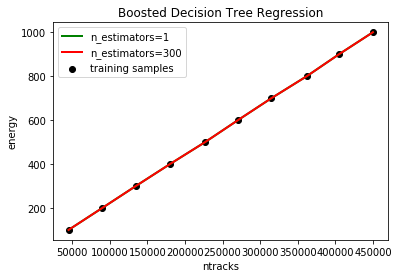

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
y = np.array([100,200,300,400,500,600,700,800,900,1000])
X = np.array([[45287.98],[90149.567],[134798.877],[180207.65],[226886.905],[270544.884],[315035.232],[361998.666],[404860.947],[449842.972]])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("ntracks")
plt.ylabel("energy")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()
%matplotlib inline

In [6]:
regr_2.predict([[243103]])

array([500.])

In [8]:
type(X)

numpy.ndarray

In [15]:
y[1]

0.35506848195746415